In [1]:
!pip install -U scikit-learn

     |████████████████████████████████| 10.6MB 7.1MB/s eta 0:00:01
     |████████████████████████████████| 286kB 11.1MB/s eta 0:00:01
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import sklearn

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
print(sklearn.__version__)

0.19.1


In [3]:
print(np.__version__)

1.14.3


In [5]:
print(pd.__version__)

0.24.2


In [4]:
print(matplotlib.__version__)

2.2.2


### Bank Loan Modelling Dataset

Source: https://www.kaggle.com/itsmesunil/bank-loan-modelling

1.ID - customer's ID

2.Age - customer's age in completed years

3.Experience - years of professional experience

4.Income - annual income of the customer ($000)

5.ZIP Code - home address zip code

6.Family - family size of the customers

7.CCAvg - avg. spending on credit cards per month ($000)

8.Education - Education level 1: Undergrad, 2:Graduate, 3:Advanced/Professional

9.Mortgage - Value of house mortgage if any ($000)

10.Personal Loan - Did this customer accept the personal loan offered in the last campaign?

11.Securities Account - Does the customer have a securities account with the bank?

12.CD Account - Does the customer have a certificate of deposit (CD) account with the bank?

13.Online - Does the customer use internet banking facilities?

14.CreditCard - Does the customer use a credit card issued by UniversalBank?

In [5]:
bank_data = pd.read_csv('datasets/bank_data.csv')

bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
1,2,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
2,3,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
3,4,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
4,5,42,18,141,94114,3,5.0,3,0,1,1,1,1,0


In [4]:
bank_data.shape

(480, 14)

In [5]:
bank_data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [6]:
bank_data = bank_data.drop(['ID', 'Experience', 'ZIP Code', 'CCAvg', 'Personal Loan'], axis=1)

In [7]:
bank_data.columns

Index(['Age', 'Income', 'Family', 'Education', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [8]:
bank_data.head()

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,34,180,1,3,0,0,0,0,0
1,38,130,4,3,134,0,0,0,0
2,46,193,2,3,0,0,0,0,0
3,38,119,1,2,0,0,1,1,1
4,42,141,3,3,0,1,1,1,0


In [9]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
Age                   480 non-null int64
Income                480 non-null int64
Family                480 non-null int64
Education             480 non-null int64
Mortgage              480 non-null int64
Securities Account    480 non-null int64
CD Account            480 non-null int64
Online                480 non-null int64
CreditCard            480 non-null int64
dtypes: int64(9)
memory usage: 33.8 KB


In [10]:
bank_data.describe()

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.00000,480.000000
mean,45.066667,144.745833,2.612500,2.233333,100.845833,0.125000,0.291667,0.60625,0.297917
std,11.590964,31.584429,1.115393,0.753373,160.847862,0.331064,0.455004,0.48909,0.457820
min,26.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,35.000000,122.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,45.000000,142.500000,3.000000,2.000000,0.000000,0.000000,0.000000,1.00000,0.000000
75%,55.000000,172.000000,4.000000,3.000000,192.500000,0.000000,1.000000,1.00000,1.000000
max,65.000000,203.000000,4.000000,3.000000,617.000000,1.000000,1.000000,1.00000,1.000000


In [6]:
bank_data.apply(lambda x: len(x.unique()))

ID                    480
Age                    40
Experience             42
Income                102
ZIP Code              238
Family                  4
CCAvg                  95
Education               3
Mortgage              141
Personal Loan           1
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [13]:
bank_data.to_csv('datasets/bank_data_processed.csv', index=False)

In [14]:
!ls datasets

_DS_Store               bank_data_processed.csv
bank_data.csv           concrete_data.csv


### Visualizing relationships

Text(0, 0.5, 'CreditCard')

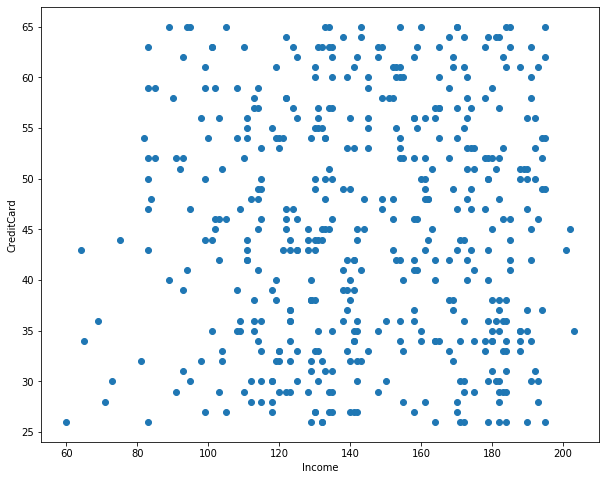

In [27]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.scatter( bank_data['Income'], bank_data['Age'])

plt.xlabel('Income')
plt.ylabel('CreditCard')

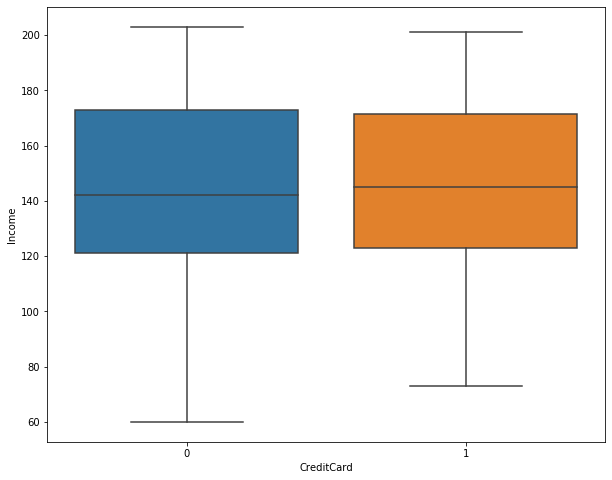

In [28]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(bank_data['CreditCard'], bank_data['Income'])

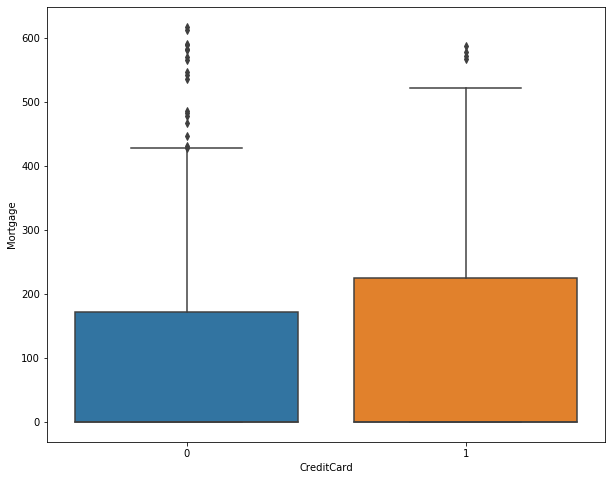

In [29]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(bank_data['CreditCard'], bank_data['Mortgage'])

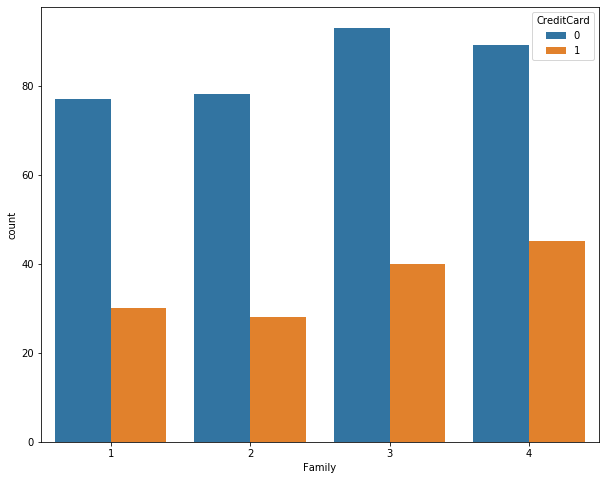

In [30]:
plt.figure(figsize=(10, 8))

sns.countplot(x='Family', data = bank_data, hue = 'CreditCard')

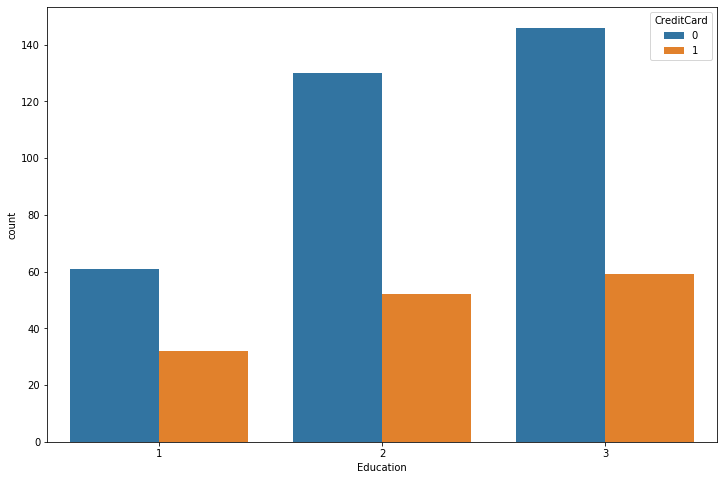

In [31]:
plt.figure(figsize=(12, 8))

sns.countplot(x='Education', data = bank_data, hue='CreditCard')

In [32]:
pd.crosstab(bank_data['Securities Account'], bank_data['CreditCard'])

CreditCard,0,1
Securities Account,,
0,294,126
1,43,17


In [33]:
bank_data_corr = bank_data.corr()

bank_data_corr

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.021260,-0.001712,-0.009196,0.041622,-0.008705,0.053308,0.028577,0.026542
Income,0.021260,1.000000,-0.020876,0.122170,0.189672,-0.053058,0.069669,0.075136,0.013477
Family,-0.001712,-0.020876,1.000000,-0.239996,0.070556,-0.106005,-0.003085,-0.039178,0.050746
Education,-0.009196,0.122170,-0.239996,1.000000,-0.026044,-0.041852,-0.071054,0.000567,-0.038536
Mortgage,0.041622,0.189672,0.070556,-0.026044,1.000000,-0.016809,0.084738,0.063899,0.039181
Securities Account,-0.008705,-0.053058,-0.106005,-0.041852,-0.016809,1.000000,0.464282,0.059631,-0.012052
CD Account,0.053308,0.069669,-0.003085,-0.071054,0.084738,0.464282,1.000000,0.385804,0.514046
Online,0.028577,0.075136,-0.039178,0.000567,0.063899,0.059631,0.385804,1.000000,-0.043762
CreditCard,0.026542,0.013477,0.050746,-0.038536,0.039181,-0.012052,0.514046,-0.043762,1.000000


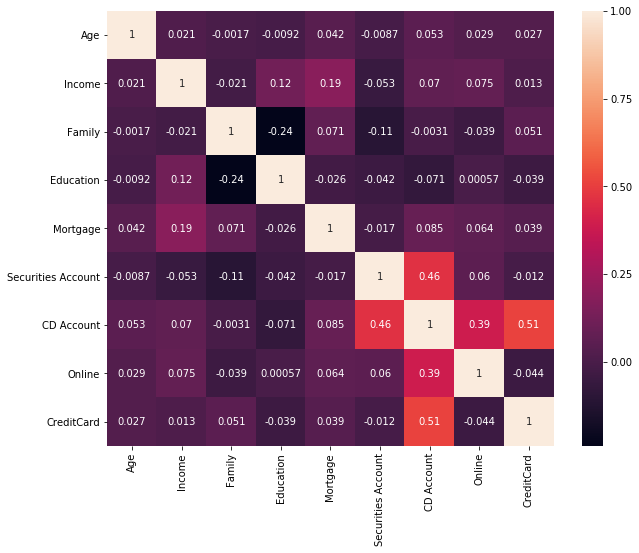

In [34]:
plt.figure(figsize=(10, 8))

sns.heatmap(bank_data_corr, annot=True)

In [7]:
X = bank_data.drop('CreditCard', axis=1)

Y = bank_data['CreditCard']

In [37]:
X.head()

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online
0,34,180,1,3,0,0,0,0
1,38,130,4,3,134,0,0,0
2,46,193,2,3,0,0,0,0
3,38,119,1,2,0,0,1,1
4,42,141,3,3,0,1,1,1


In [8]:
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: CreditCard, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [40]:
x_train.shape, y_train.shape

((384, 8), (384,))

In [41]:
x_test.shape, y_test.shape

((96, 8), (96,))

### Voting Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

In [10]:
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
log_clf = LogisticRegression(C=1, solver='liblinear')

svc_clf = SVC(C=1, kernel='linear', gamma='auto')

naive_clf = GaussianNB()

In [12]:
for clf in (log_clf, svc_clf, naive_clf):
    
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.75
SVC 0.75
GaussianNB 0.8229166666666666


#### Hard voting
Hard voting classifier (voting='hard') aggregate the predictions of each classifier and predict the class that gets the most votes

In [15]:
voting_clf_hard = VotingClassifier(estimators=[('lr', log_clf), 
                                               ('svc', svc_clf), 
                                               ('naive', naive_clf)],
                                   voting='hard')

In [17]:
voting_clf_hard.estimators

[('lr',
  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False)),
 ('svc', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)),
 ('naive', GaussianNB(priors=None))]

In [18]:
voting_clf_hard.named_estimators

{'lr': LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'svc': SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 'naive': GaussianNB(priors=None)}

In [19]:
voting_clf_hard.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('svc', SVC(C=1,...random_state=None, shrinking=True,
  tol=0.001, verbose=False)), ('naive', GaussianNB(priors=None))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [20]:
y_pred = voting_clf_hard.predict(x_test)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [21]:
accuracy_score(y_test, y_pred)

0.75

#### Precision, Recall and F1-scores

In [22]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.75      1.00      0.86        72
          1       0.00      0.00      0.00        24

avg / total       0.56      0.75      0.64        96



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Confusion Matrix

In [23]:
print(confusion_matrix(y_test, y_pred))

[[72  0]
 [24  0]]


In [24]:
for clf_hard in (log_clf, svc_clf, naive_clf, voting_clf_hard):
    
    clf_hard.fit(x_train, y_train)
    y_pred = clf_hard.predict(x_test)
    
    print(clf_hard.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.75
SVC 0.75
GaussianNB 0.8229166666666666
VotingClassifier 0.75


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Soft voting requires probability scores

In [25]:
y_pred_probs = log_clf.predict_proba(x_test)

y_pred_probs[:10]

array([[0.72118593, 0.27881407],
       [0.60675388, 0.39324612],
       [0.72908395, 0.27091605],
       [0.69335689, 0.30664311],
       [0.63853519, 0.36146481],
       [0.63563549, 0.36436451],
       [0.68460761, 0.31539239],
       [0.61048   , 0.38952   ],
       [0.69032544, 0.30967456],
       [0.68974528, 0.31025472]])

In [26]:
y_pred_probs = naive_clf.predict_proba(x_test)

y_pred_probs[:10]

array([[0.86563759, 0.13436241],
       [0.72977674, 0.27022326],
       [0.90210852, 0.09789148],
       [0.21400797, 0.78599203],
       [0.24641361, 0.75358639],
       [0.82739332, 0.17260668],
       [0.85701978, 0.14298022],
       [0.8729611 , 0.1270389 ],
       [0.88782236, 0.11217764],
       [0.82663863, 0.17336137]])

In [27]:
y_pred_probs = svc_clf.predict_proba(x_test)

AttributeError: predict_proba is not available when  probability=False

#### Soft voting
Soft voting classifier (voting='soft') predict the class with the highest class probability, averaged over all the individual classifiers. 

All of the above classifiers are by default enabled for probability estimates except SVC.    
So in SVC we have to pass one more parameter as probability=True

In [28]:
svc_clf_soft = SVC(C=1, kernel='linear', gamma='auto', probability=True)

In [29]:
voting_clf_soft = VotingClassifier(estimators=[('lr', log_clf), 
                                               ('svc', svc_clf_soft), 
                                               ('naive', naive_clf)],
                                   voting='soft', 
                                   weights = [0.40, 0.30, 0.30])

In [30]:
for clf_soft in (log_clf, svc_clf_soft, naive_clf, voting_clf_soft):
    
    clf_soft.fit(x_train, y_train)
    y_pred = clf_soft.predict(x_test)
    
    print(clf_soft.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.75
SVC 0.75
GaussianNB 0.8229166666666666
VotingClassifier 0.7395833333333334


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
